1. Get the data

First, download train.csv from https://www.kaggle.com/c/titanic/data and place it in your working folder, then:

In [2]:
import pandas as pd

# 1.1 — Load
df = pd.read_csv('train.csv')

# 1.2 — Quick peek
print(df.shape)
display(df.head())
df.info()


(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


2. Data Cleaning & Feature Engineering

In [5]:
import numpy as np

# 2.1 — Inspect current columns & missingness
print("Columns before cleaning:", df.columns.tolist())
print(df.isnull().sum(), "\n")

# 2.2 — Drop unneeded columns (ignore if they’re already gone)
to_drop = ['Cabin','PassengerId','Name','Ticket']
df.drop(columns=to_drop, inplace=True, errors='ignore')

# 2.3 — Fill missing Embarked with mode
if 'Embarked' in df:
    df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# 2.4 — Impute Age by median of each Pclass × Sex group
if 'Age' in df and 'Pclass' in df and 'Sex' in df:
    df['Age'] = df['Age'].fillna(
        df.groupby(['Pclass','Sex'])['Age']
          .transform('median')
    )

# 2.5 — Create FamilySize feature (if SibSp & Parch exist)
if {'SibSp','Parch'}.issubset(df.columns):
    df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

# 2.6 — Final check
print("Columns after cleaning:", df.columns.tolist())
print(df.isnull().sum())

Columns before cleaning: ['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      0
dtype: int64 

Columns after cleaning: ['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'FamilySize']
Survived      0
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked      0
FamilySize    0
dtype: int64


/tmp/ipython-input-5-1135387323.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)


3. Exploratory Data Analysis

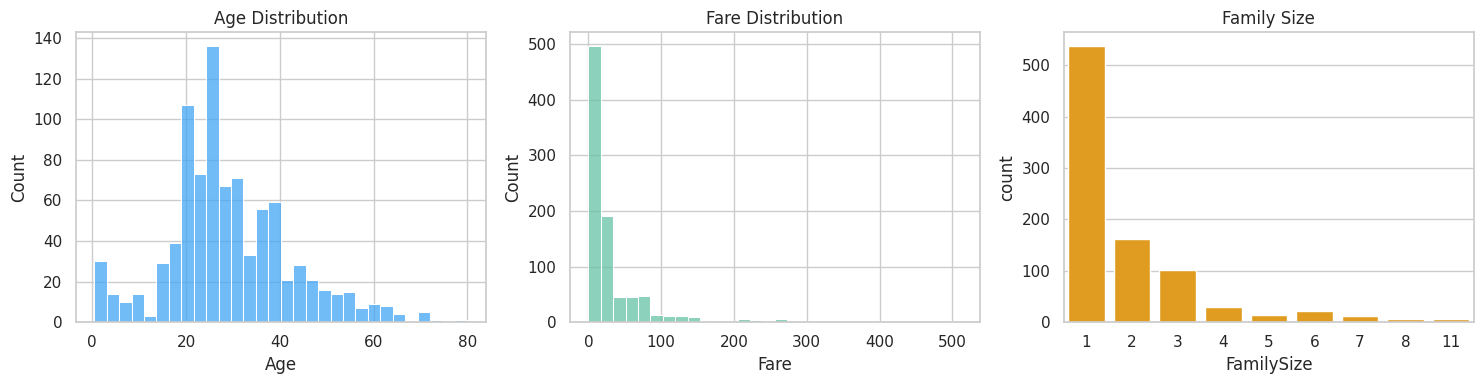

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# 3.0 — Set a global style
sns.set(style='whitegrid')

# define some colors/palettes
age_color       = '#42a5f5'         # blue
fare_color      = '#66c2a5'         # teal
fam_color       = '#ffa600'         # amber
sex_palette     = {'male':'#1f77b4','female':'#ff7f0e'}
class_palette   = {1:'#2ca02c',2:'#d62728',3:'#9467bd'}
surv_palette    = ['#d62728','#2ca02c']  # red for died, green for survived

# 3.1 — Univariate distributions
fig, axes = plt.subplots(1,3, figsize=(15,4))

# Age
sns.histplot(df['Age'], bins=30, color=age_color, ax=axes[0])
axes[0].set_title('Age Distribution')

# Fare
sns.histplot(df['Fare'], bins=30, color=fare_color, ax=axes[1])
axes[1].set_title('Fare Distribution')

# FamilySize
sns.countplot(x='FamilySize', data=df, color=fam_color, ax=axes[2])
axes[2].set_title('Family Size')

plt.tight_layout()
plt.show()

/tmp/ipython-input-11-1031507969.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Sex', y='Survived', data=df,
/tmp/ipython-input-11-1031507969.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Pclass', y='Survived', data=df,


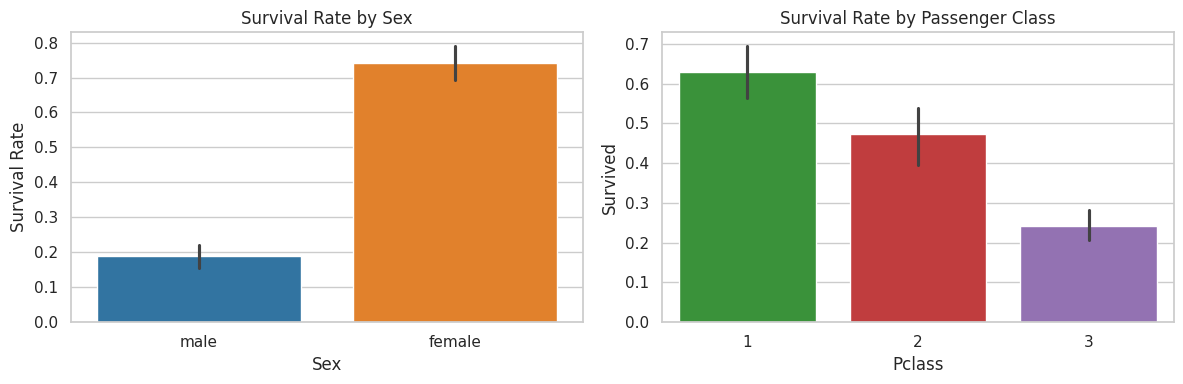

In [11]:
# 3.2 — Survival rate by Sex & Pclass
fig, axes = plt.subplots(1,2, figsize=(12,4))

sns.barplot(x='Sex', y='Survived', data=df,
            palette=sex_palette, ax=axes[0])
axes[0].set_ylabel('Survival Rate')
axes[0].set_title('Survival Rate by Sex')

sns.barplot(x='Pclass', y='Survived', data=df,
            palette=[class_palette[c] for c in sorted(class_palette)], ax=axes[1])
axes[1].set_title('Survival Rate by Passenger Class')

plt.tight_layout()
plt.show()

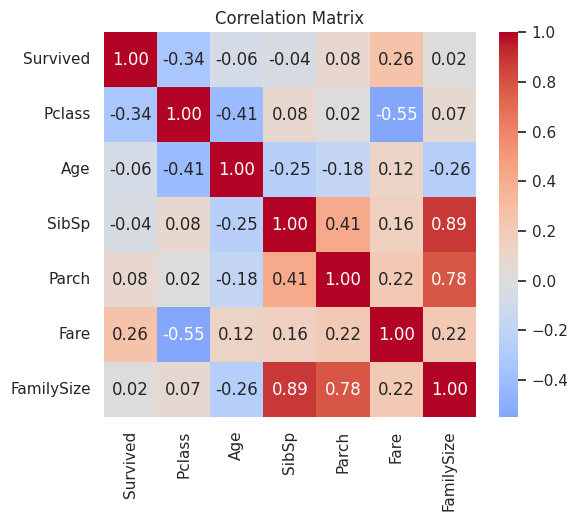

In [12]:
# 3.3 — Correlation heatmap
num_cols = ['Survived','Pclass','Age','SibSp','Parch','Fare','FamilySize']
corr = df[num_cols].corr()
plt.figure(figsize=(6,5))
sns.heatmap(corr, annot=True, fmt=".2f",
            cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

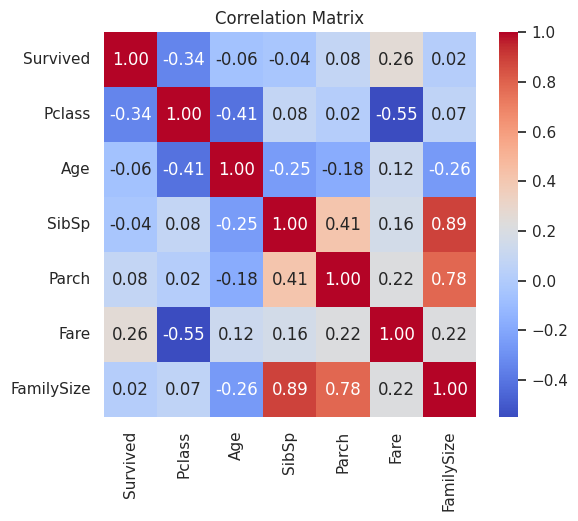

In [9]:
# 3.4 — Correlation heatmap
num_cols = ['Survived','Pclass','Age','SibSp','Parch','Fare','FamilySize']
corr = df[num_cols].corr()
plt.figure(figsize=(6,5))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

/tmp/ipython-input-13-1657848118.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Survived', y='Age', data=df,


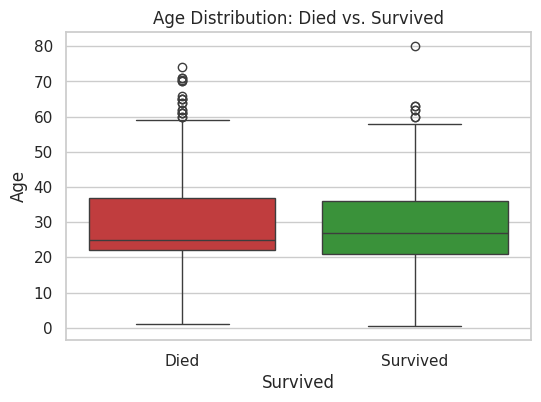

In [13]:
# 3.4 — Boxplot: Age by Survival
plt.figure(figsize=(6,4))
sns.boxplot(x='Survived', y='Age', data=df,
            palette=surv_palette)
plt.title('Age Distribution: Died vs. Survived')
plt.xticks([0,1], ['Died','Survived'])
plt.show()

/tmp/ipython-input-14-932607018.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


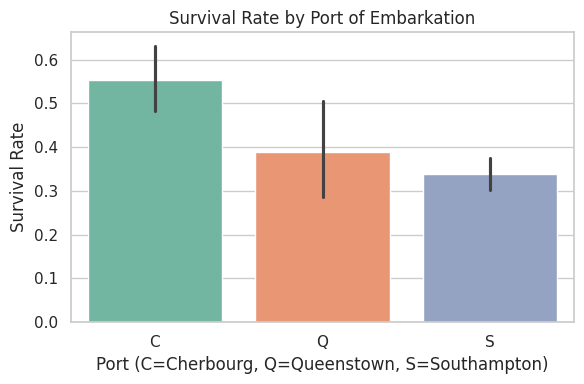

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style='whitegrid')

# 3.5 — Survival rate by Port of Embarkation
plt.figure(figsize=(6,4))
sns.barplot(
    x='Embarked', y='Survived', data=df,
    palette='Set2', order=['C','Q','S']
)
plt.title('Survival Rate by Port of Embarkation')
plt.ylabel('Survival Rate')
plt.xlabel('Port (C=Cherbourg, Q=Queenstown, S=Southampton)')
plt.tight_layout()
plt.show()

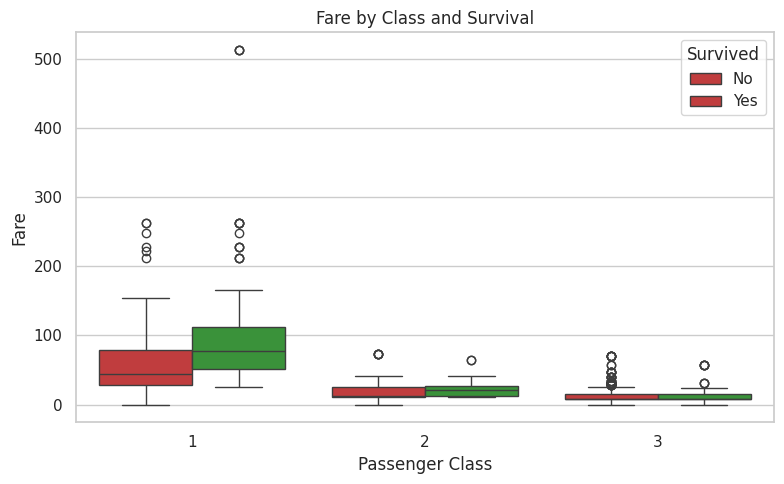

In [15]:
# 3.6 — Fare distribution by Class & Survival
plt.figure(figsize=(8,5))
sns.boxplot(
    x='Pclass', y='Fare', hue='Survived', data=df,
    palette=['#d62728','#2ca02c']  # red=died, green=survived
)
plt.title('Fare by Class and Survival')
plt.xlabel('Passenger Class')
plt.ylabel('Fare')
plt.legend(title='Survived', labels=['No','Yes'])
plt.tight_layout()
plt.show()

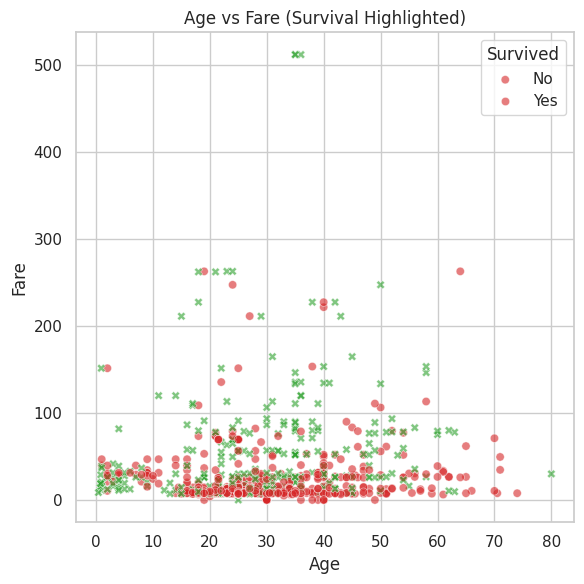

In [16]:
# 3.7 — Scatter: Age vs Fare colored by Survival
plt.figure(figsize=(6,6))
sns.scatterplot(
    x='Age', y='Fare',
    hue='Survived', style='Survived',
    palette=['#d62728','#2ca02c'],
    data=df, alpha=0.6
)
plt.title('Age vs Fare (Survival Highlighted)')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.legend(title='Survived', labels=['No','Yes'])
plt.tight_layout()
plt.show()

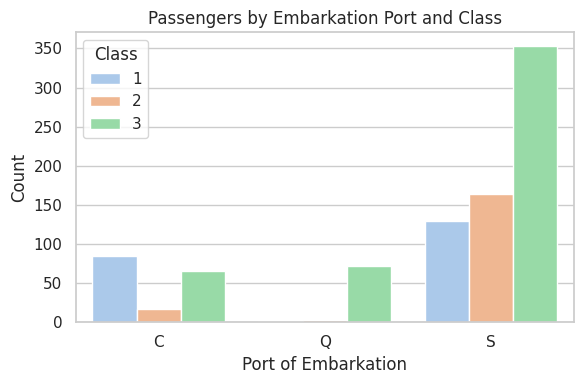

In [17]:
# 3.8 — Count of Embarked by Class
plt.figure(figsize=(6,4))
sns.countplot(
    x='Embarked', hue='Pclass', data=df,
    palette='pastel', order=['C','Q','S']
)
plt.title('Passengers by Embarkation Port and Class')
plt.xlabel('Port of Embarkation')
plt.ylabel('Count')
plt.legend(title='Class')
plt.tight_layout()
plt.show()

/tmp/ipython-input-18-578856583.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


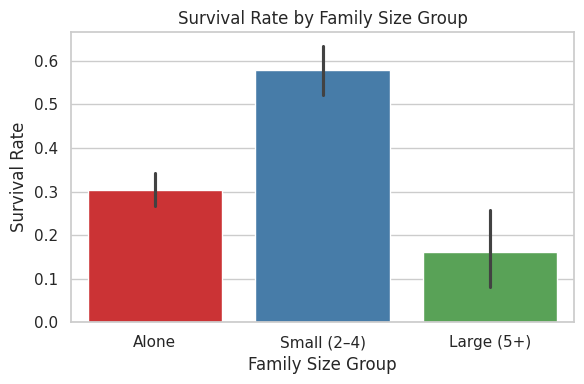

In [18]:
# 3.9 — Survival rate vs FamilySize groups
#    define groups: Alone (1), Small (2–4), Large (5+)
df['FamilyGroup'] = pd.cut(
    df['FamilySize'],
    bins=[0,1,4, df['FamilySize'].max()],
    labels=['Alone','Small (2–4)','Large (5+)']
)

plt.figure(figsize=(6,4))
sns.barplot(
    x='FamilyGroup', y='Survived', data=df,
    palette='Set1', order=['Alone','Small (2–4)','Large (5+)']
)
plt.title('Survival Rate by Family Size Group')
plt.xlabel('Family Size Group')
plt.ylabel('Survival Rate')
plt.tight_layout()
plt.show()

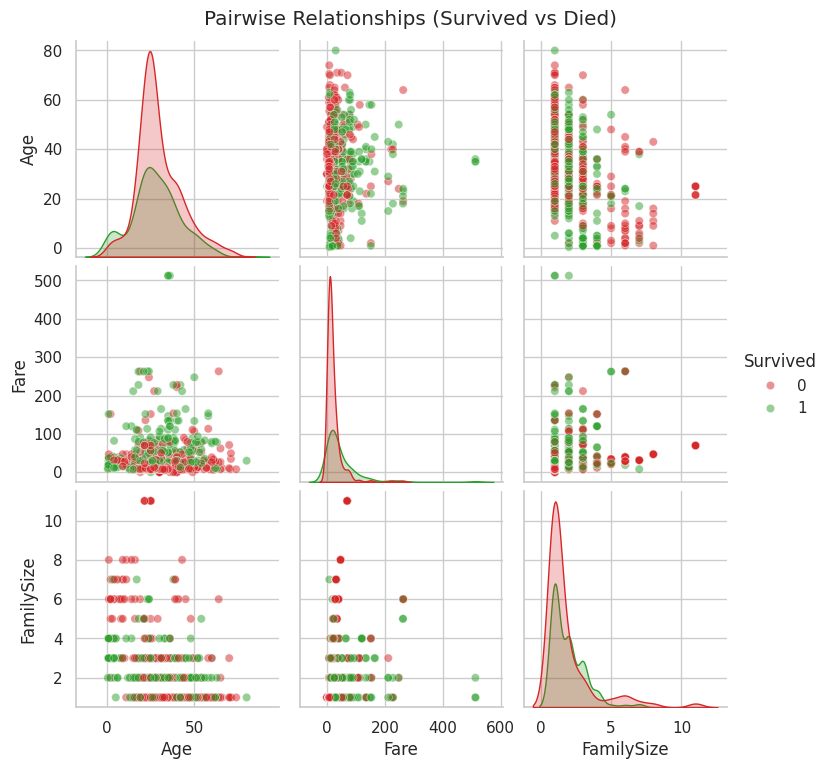

In [19]:
# 3.10 — Pairplot of key numeric features
sns.pairplot(
    df[['Age','Fare','FamilySize','Survived']],
    hue='Survived',
    palette={0:'#d62728',1:'#2ca02c'},
    diag_kind='kde',
    plot_kws={'alpha':0.5}
)
plt.suptitle('Pairwise Relationships (Survived vs Died)', y=1.02)
plt.show()